<a href="https://colab.research.google.com/github/VitalyGladyshev/DB_rep/blob/master/HW2_%D0%93%D0%BB%D0%B0%D0%B4%D1%8B%D1%88%D0%B5%D0%B2%D0%92%D0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 2 Гладышев ВВ

## Подготовка таблиц

```sql
CREATE TABLE customers (
  customer_id int4 PRIMARY KEY,
  first_name varchar(50),
  last_name varchar(50),
  gender varchar(30),
  dob varchar(50),
  job_title varchar(50),
  job_industry_category varchar(50),
  wealth_segment varchar(50),
  deceased_indicator varchar(50),
  owns_car varchar(30),
  address varchar(50),
  postcode varchar(30),
  state varchar(30),
  country varchar(30),
  property_valuation int4
);

CREATE TABLE transactions (
  transaction_id int4 PRIMARY KEY,
  product_id int4,
  customer_id int4,
  transaction_date varchar(30),
  online_order varchar(30),
  order_status varchar(30),
  brand varchar(30),
  product_line varchar(30),
  product_class varchar(30),
  product_size varchar(30),
  list_price float4,
  standard_cost float4
 );
```

## Задание 1

Вывести все уникальные бренды, у которых стандартная стоимость выше 1500 долларов.

```sql
select distinct brand
from transactions
where standard_cost > 1500
  and standard_cost is not null;
```

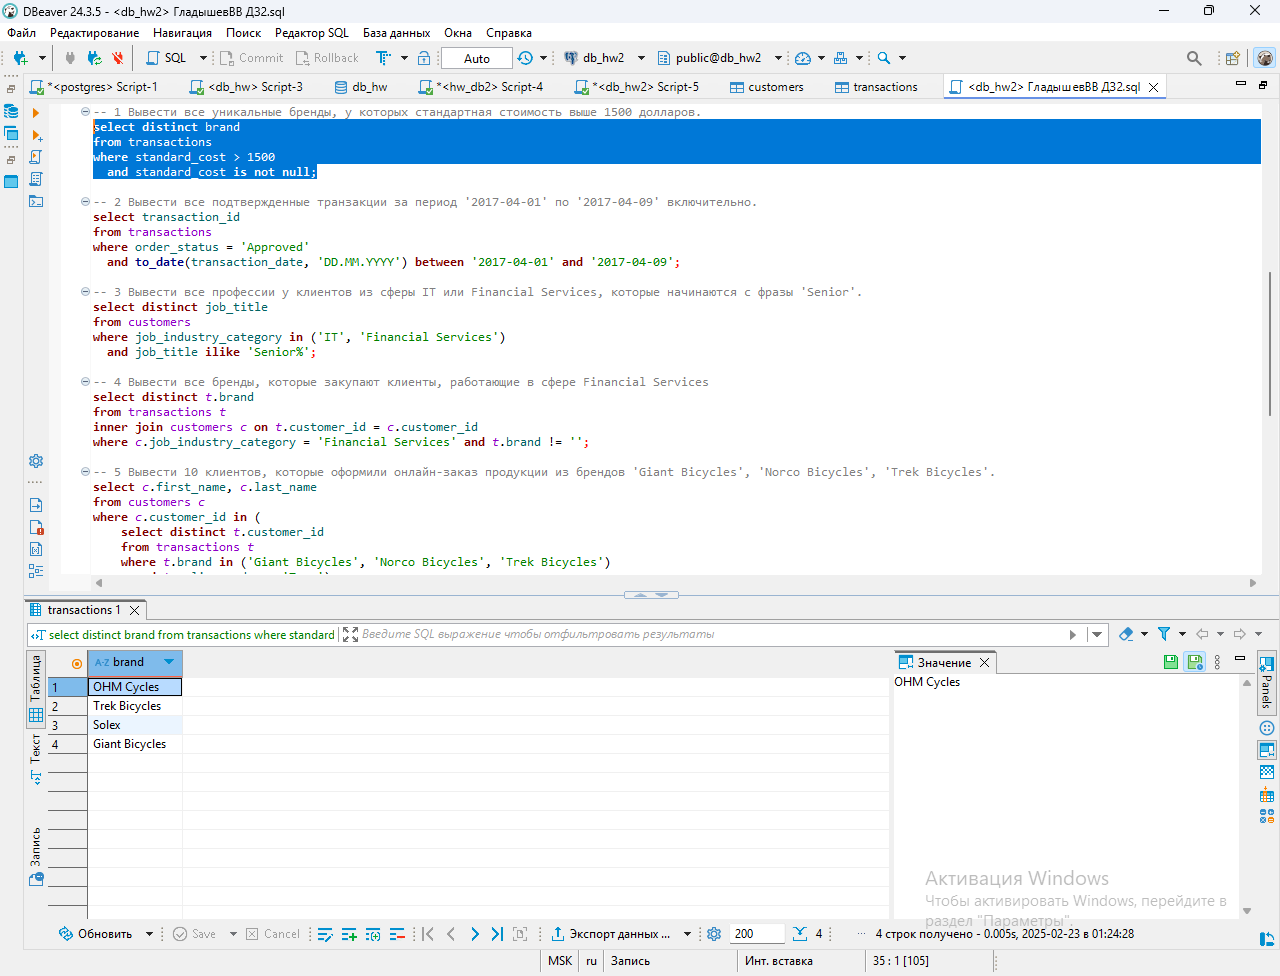

## Задание 2

Вывести все подтвержденные транзакции за период '2017-04-01' по '2017-04-09' включительно.

```sql
select transaction_id
from transactions
where order_status = 'Approved'
  and to_date(transaction_date, 'DD.MM.YYYY') between '2017-04-01' and '2017-04-09';
```


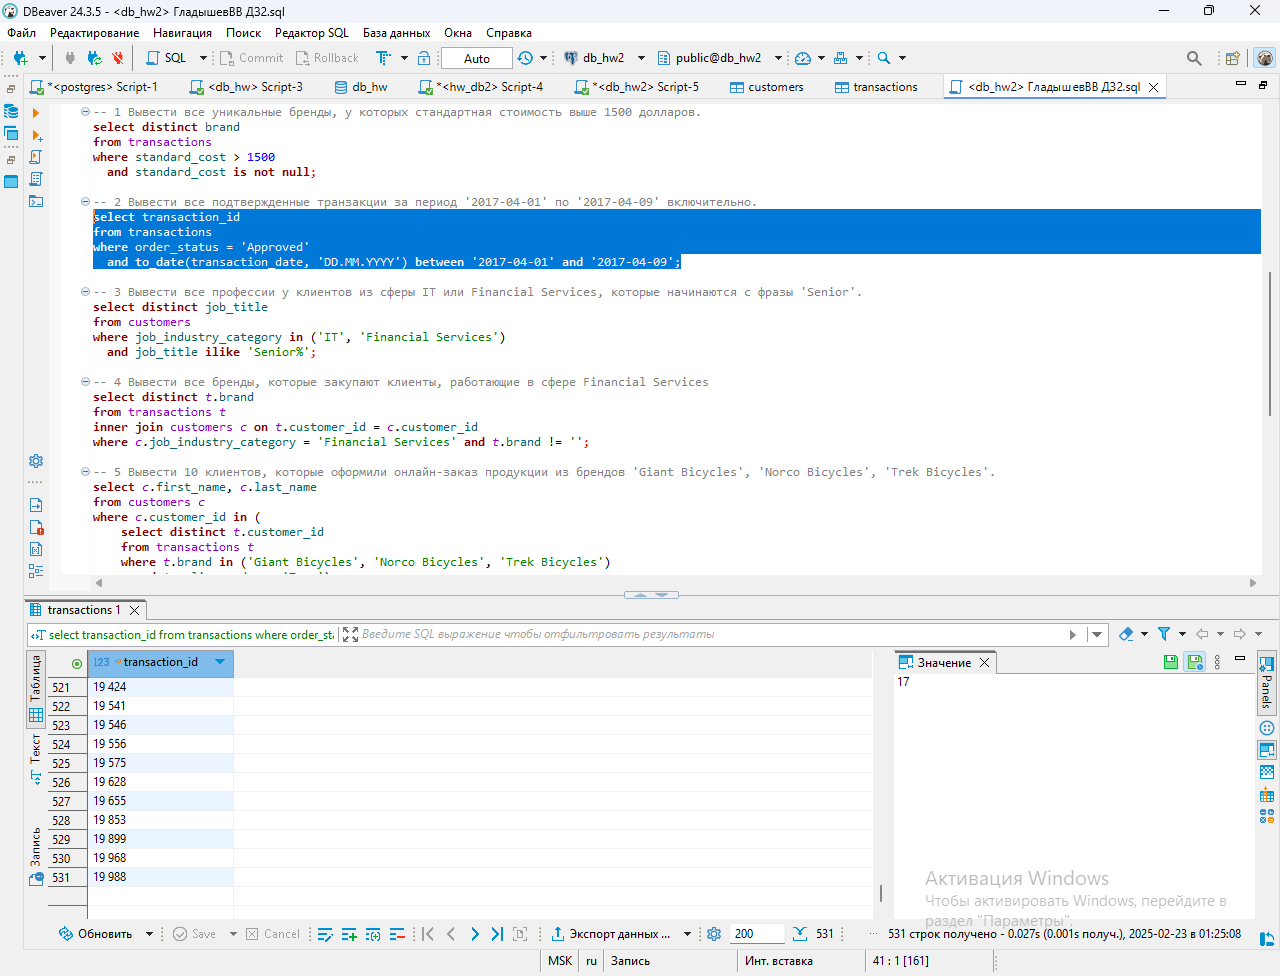

## Задание 3

Вывести все профессии у клиентов из сферы IT или Financial Services, которые начинаются с фразы 'Senior'.

```sql
select distinct job_title
from customers
where job_industry_category in ('IT', 'Financial Services')
  and job_title ilike 'Senior%';
```

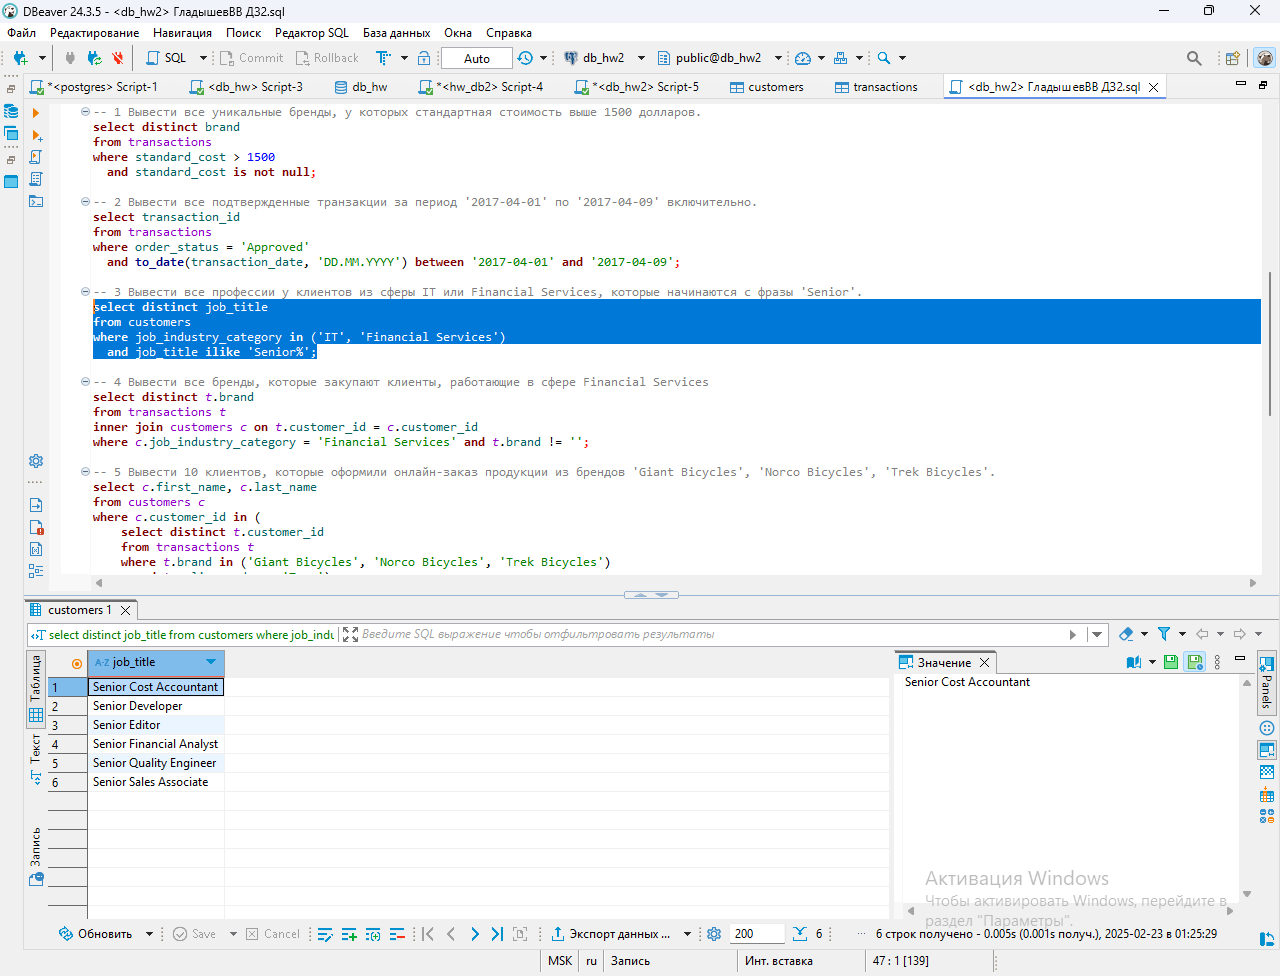

## Задание 4

Вывести все бренды, которые закупают клиенты, работающие в сфере Financial Services

```sql
select distinct t.brand
from transactions t
inner join customers c on t.customer_id = c.customer_id
where c.job_industry_category = 'Financial Services' and t.brand != '';
```

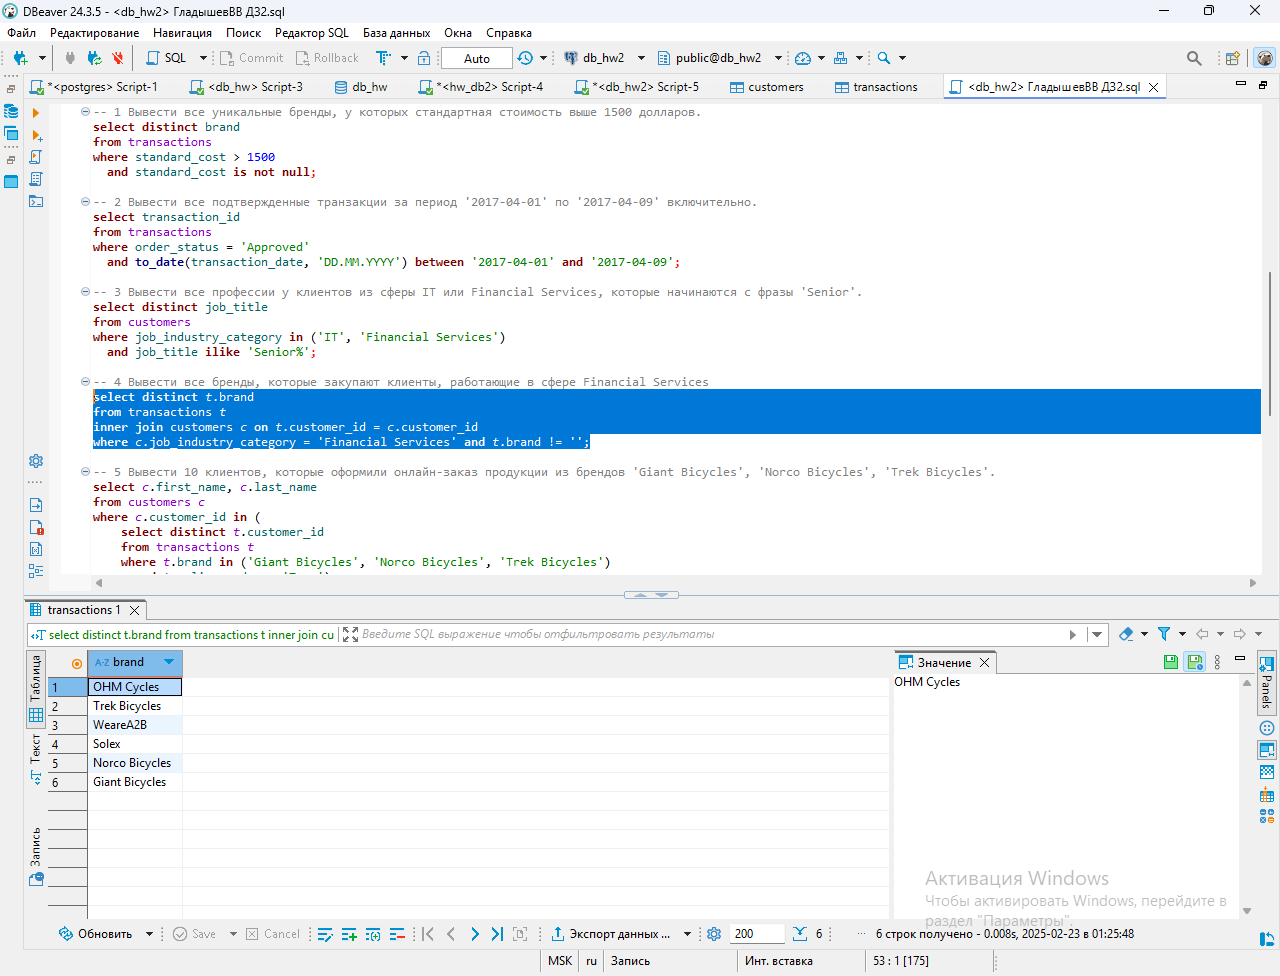

## Задание 5

Вывести 10 клиентов, которые оформили онлайн-заказ продукции из брендов 'Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles'.

```sql
select c.first_name, c.last_name
from customers c
where c.customer_id in (
    select distinct t.customer_id
    from transactions t
    where t.brand in ('Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles')
      and t.online_order = 'True')
limit 10;

```

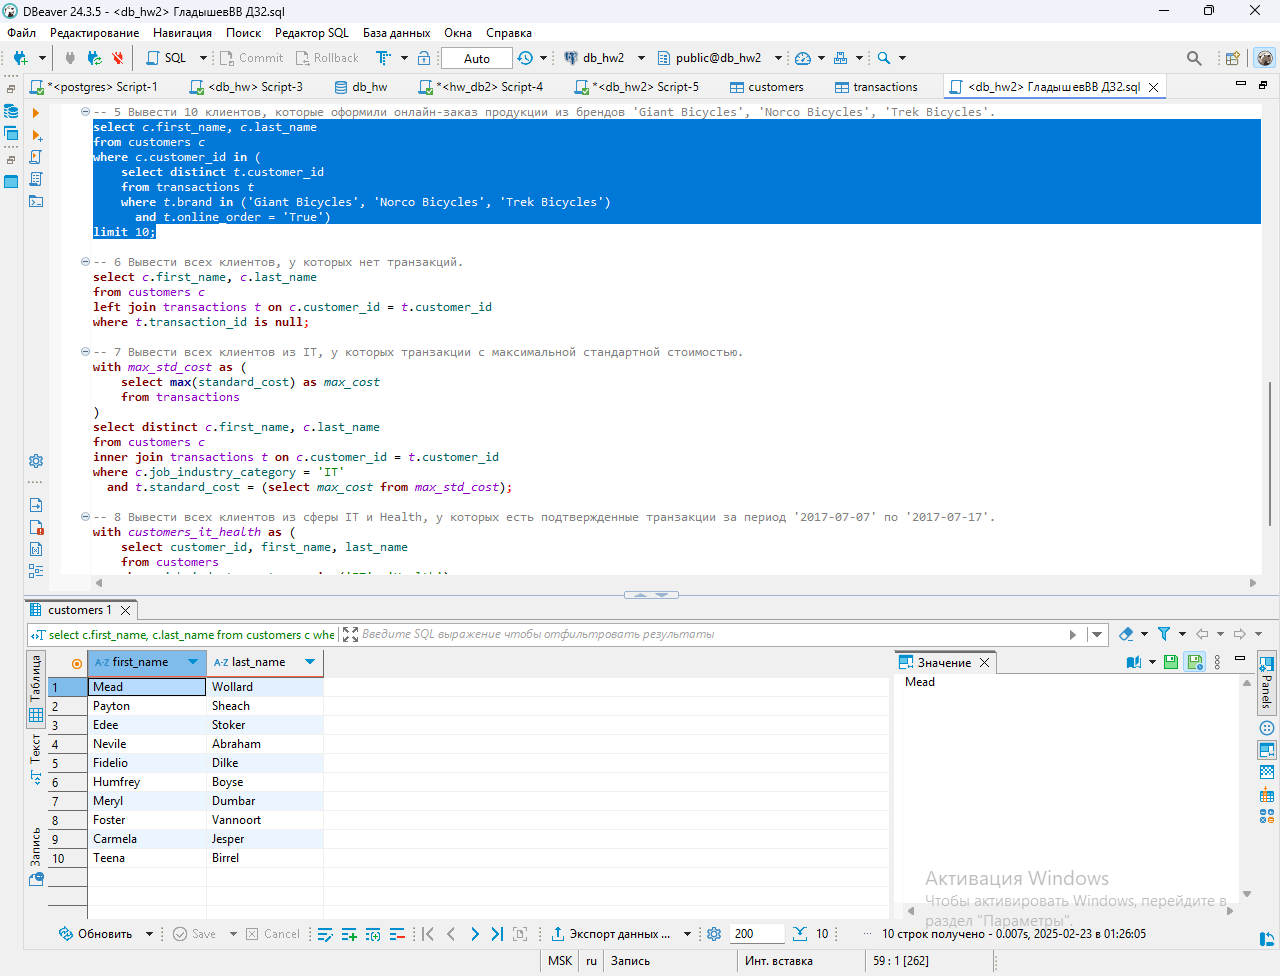

## Задание 6

Вывести всех клиентов, у которых нет транзакций.

```sql
select c.first_name, c.last_name
from customers c
left join transactions t on c.customer_id = t.customer_id
where t.transaction_id is null;
```

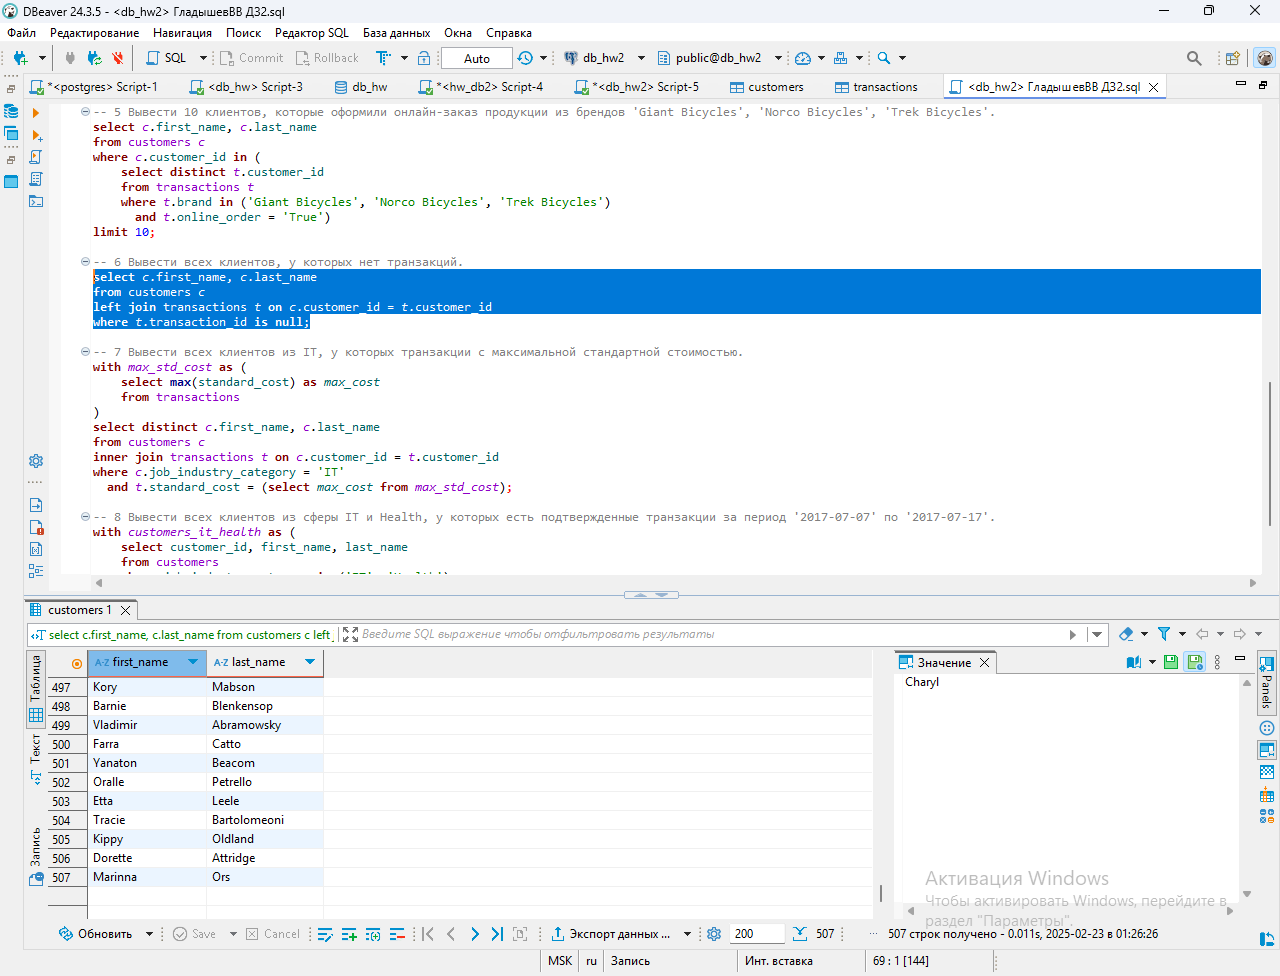

## Задание 7

Вывести всех клиентов из IT, у которых транзакции с максимальной стандартной стоимостью.

```sql
with max_std_cost as (
    select max(standard_cost) as max_cost
    from transactions
)
select distinct c.first_name, c.last_name
from customers c
inner join transactions t on c.customer_id = t.customer_id
where c.job_industry_category = 'IT'
  and t.standard_cost = (select max_cost from max_std_cost);
```

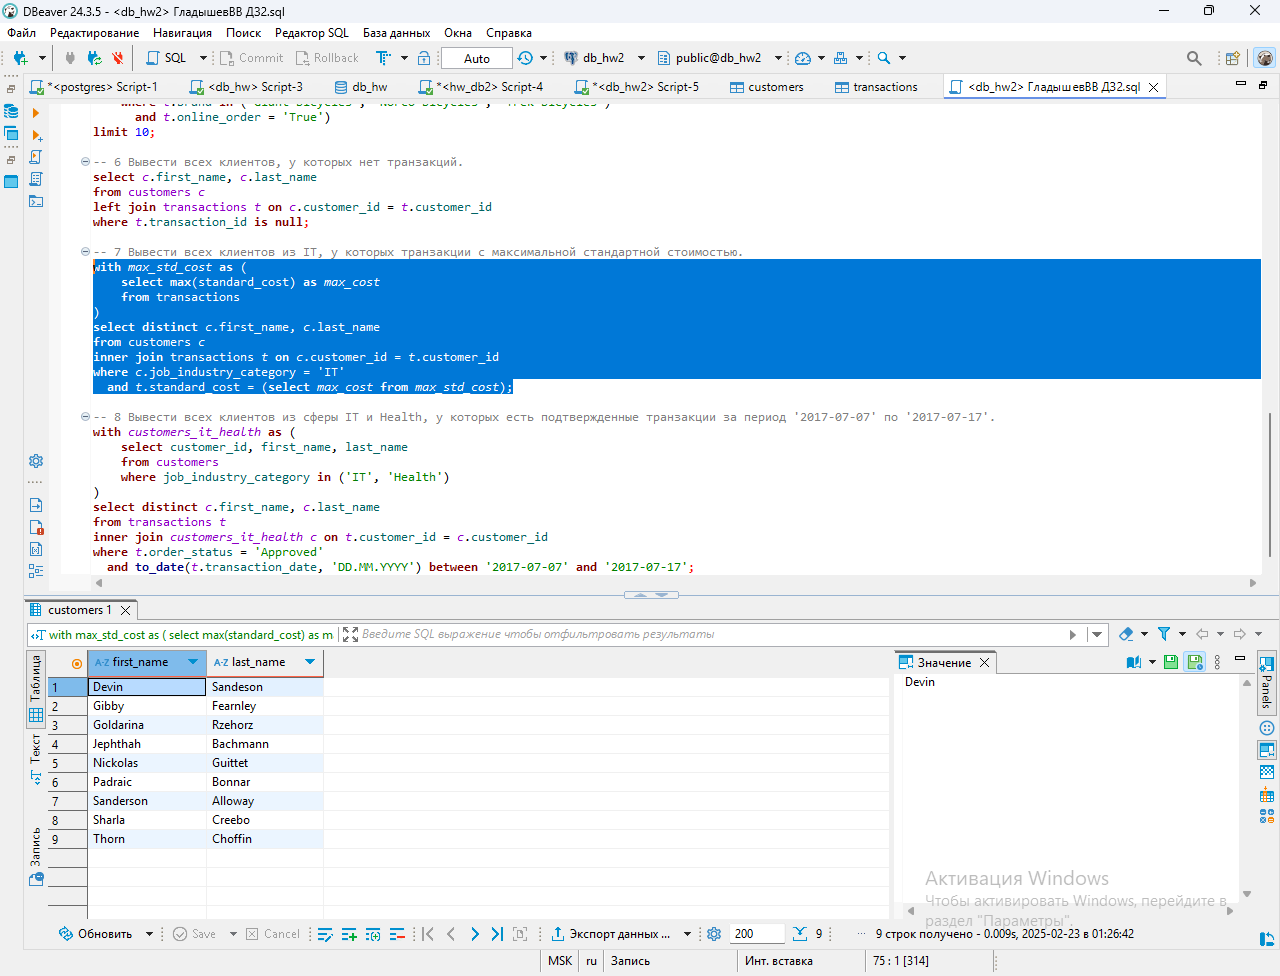

## Задание 8

Вывести всех клиентов из сферы IT и Health, у которых есть подтвержденные транзакции за период '2017-07-07' по '2017-07-17'.

```sql
with customers_it_health as (
    select customer_id, first_name, last_name
    from customers
    where job_industry_category in ('IT', 'Health')
)
select distinct c.first_name, c.last_name
from transactions t
inner join customers_it_health c on t.customer_id = c.customer_id
where t.order_status = 'Approved'
  and to_date(t.transaction_date, 'DD.MM.YYYY') between '2017-07-07' and '2017-07-17';
```

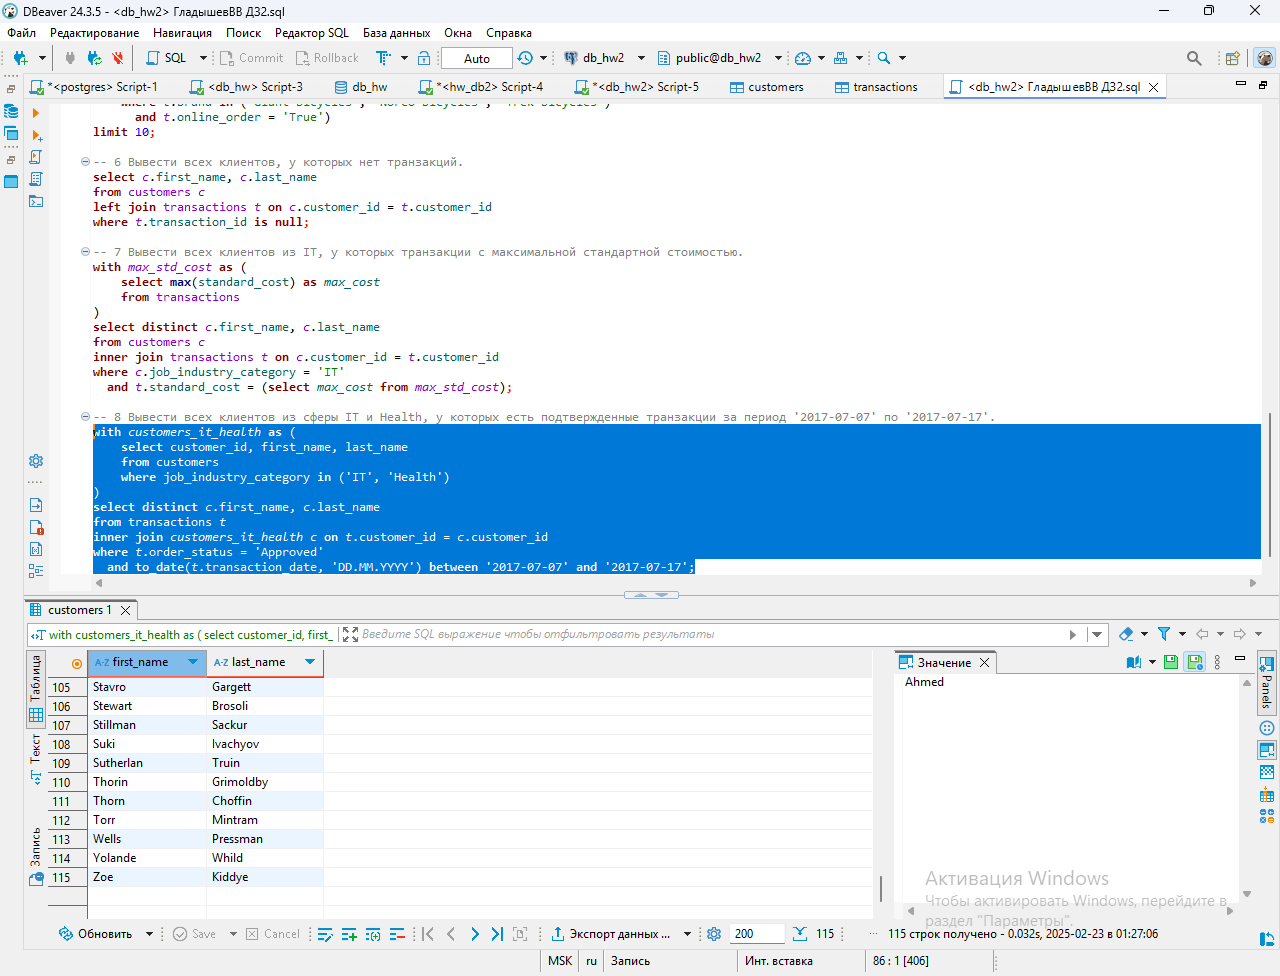